In [92]:
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [10]:
data = pd.read_csv('df_to_model.csv').set_index('date')

In [48]:
data.head()

,btc_price,btc_volume,eth_price,eth_volume,bnb_price,bnb_volume,vet_price,vet_volume,btt_price,btt_volume,hot_price,hot_volume
date,,,,,,,,,,,,
2013-04-28,135.30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2013-04-29,141.96,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2013-04-30,135.30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2013-05-01,117.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2013-05-02,103.43,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Lets try to predict hot price and verify if it can be predicted by past information from other coins. For this we will drop its volume and create some lagged values.

In [54]:
data = data.loc[data.hot_price!=0]

In [55]:
X = data.drop(columns = ['hot_price', 'hot_volume'])
y = data[['hot_price']]

In [56]:
lag_1 = X.shift(1)
lag_1.columns = ['lagged_1_' + column for column in X.columns]

lag_2 = X.shift(2)
lag_2.columns = ['lagged_2_' + column for column in X.columns]

lag_3 = X.shift(3)
lag_3.columns = ['lagged_3_' + column for column in X.columns]

In [57]:
X_lagged = (
    lag_1.iloc[3:]
    .join(lag_2.iloc[3:])
    .join(lag_3.iloc[3:])
)

In [62]:
X_lagged.head()

,lagged_1_btc_price,lagged_1_btc_volume,lagged_1_eth_price,lagged_1_eth_volume,lagged_1_bnb_price,lagged_1_bnb_volume,lagged_1_vet_price,lagged_1_vet_volume,lagged_1_btt_price,lagged_1_btt_volume,...,lagged_3_btc_price,lagged_3_btc_volume,lagged_3_eth_price,lagged_3_eth_volume,lagged_3_bnb_price,lagged_3_bnb_volume,lagged_3_vet_price,lagged_3_vet_volume,lagged_3_btt_price,lagged_3_btt_volume
date,,,,,,,,,,,,,,,,,,,,,
2018-05-03,9024.387512,2.661071e+09,665.225786,1.342793e+09,14.060865,5.595434e+07,0.0,0.0,0.0,0.0,...,9325.628851,2.827555e+09,680.120495,1.180427e+09,14.947588,7.530959e+07,0.0,0.0,0.0,0.0
2018-05-04,9122.653014,2.179559e+09,676.552564,1.153897e+09,14.249384,5.661672e+07,0.0,0.0,0.0,0.0,...,9198.189510,2.508704e+09,662.732736,1.271088e+09,14.246400,5.727836e+07,0.0,0.0,0.0,0.0
2018-05-05,9551.135184,1.228125e+09,781.425780,1.005515e+09,15.448140,1.583041e+05,0.0,0.0,0.0,0.0,...,9024.387512,2.661071e+09,665.225786,1.342793e+09,14.060865,5.595434e+07,0.0,0.0,0.0,0.0
2018-05-06,9634.538226,2.695999e+09,777.907647,1.967183e+09,14.237159,5.263799e+07,0.0,0.0,0.0,0.0,...,9122.653014,2.179559e+09,676.552564,1.153897e+09,14.249384,5.661672e+07,0.0,0.0,0.0,0.0
2018-05-07,9766.244485,2.617991e+09,807.067329,1.617672e+09,14.291985,5.092181e+07,0.0,0.0,0.0,0.0,...,9551.135184,1.228125e+09,781.425780,1.005515e+09,15.448140,1.583041e+05,0.0,0.0,0.0,0.0


In [63]:
X_train, X_test, y_train, y_test = train_test_split(X_lagged, y.iloc[3:], test_size = 0.2)

In [65]:
RFR = RandomForestRegressor()

In [66]:
RFR.fit(X_train, y_train)

<ipython-input-66-9be308012765>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RFR.fit(X_train, y_train)


RandomForestRegressor()

In [68]:
predictions = RFR.predict(X_test)

In [70]:
mean_squared_error(y_test, predictions)

2.2786913912172206e-07

In [86]:
to_plot = y_test.copy()
to_plot['predictions'] = predictions

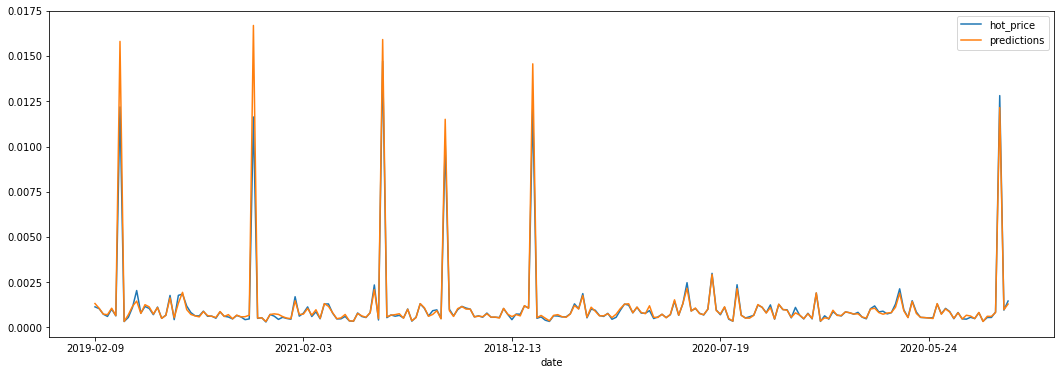

In [93]:
to_plot.plot(figsize = [18, 6])
plt.show()